Contents

1. Reading in data
2. Exploring over and underfit models with KNN
3. Confusion matrix, recall, and precision
4. Receiver Operating Characteristic (ROC) and Area Under the Curve (AUC)

In [29]:
'''Import all necessary packages'''

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report,roc_curve,roc_auc_score
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

# 1. Reading in data

In [2]:
# Check your directory path
%pwd

'/Users/ram/Desktop/INFO 6105 LS copy/Module V'

In [3]:
# Create root path variable to avoid typing long path names later
path = '/Users/ram/Desktop/INFO 6105 LS copy/Module V'

In [4]:
# List all files if necessary and locate your file
!ls

Module V.ipynb        titanic_test_4_ml.csv titanic_trn_4_ml.csv


In [5]:
'''Read in training and test datasetes. Here, for simplicity, we use
train and test instead of train and valid and test'''

trn_df = pd.read_csv(f'{path}/titanic_trn_4_ml.csv')
test_df = pd.read_csv(f'{path}/titanic_test_4_ml.csv')

print(trn_df.shape)
print(test_df.shape)

(1100, 13)
(209, 13)


In [6]:
trn_df.head(2)

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked,Age_na,Fare_na,Age,Fare,Survived
0,1,3,135,2,1,0,629,3,False,False,-0.574896,-0.502155,0
1,2,1,245,1,1,0,713,1,False,False,0.659705,0.747957,1


In [7]:
test_df.head(2)

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked,Age_na,Fare_na,Age,Fare,Survived
0,1101,3,47,2,0,0,106,3,False,False,-0.343408,-0.489547,1
1,1102,3,6,2,0,0,146,3,False,False,0.196729,-0.203944,0


# 2. Exploring over and under fit models with KNN

In [8]:
#Create X and Y for train
x_train = trn_df.drop('Survived',axis = 1)
y_train = trn_df['Survived']
print(x_train.shape,y_train.shape)

(1100, 12) (1100,)


In [9]:
#Create X and Y for test set

x_test = test_df.drop('Survived',axis = 1)
y_test = test_df['Survived']
print(x_test.shape,y_test.shape)

(209, 12) (209,)


In [10]:
# Train AND predict on the TRAINING set with k = 1

knn_model = KNeighborsClassifier(n_neighbors = 1)
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_train)

In [11]:
#Evaluate training set accuracy
accuracy_score(y_train,y_pred)

1.0

In [12]:
#Evaluate test set accuracy
y_pred_test = knn_model.predict(x_test)

In [13]:
#Evaluate test set accuracy
accuracy_score(y_test,y_pred_test)

0.5406698564593302

Training set accuracy (=1.0) is much greater than test set 
accuracy (0.54). This means that we have an overfit model!
Let's try reducing the value of K to see if we get better 
test set accuracy

In [14]:
# Train AND predict on the TRAINING set with k = 5
knn_model_I = KNeighborsClassifier(n_neighbors = 5)
knn_model_I.fit(x_train, y_train)
y_pred = knn_model_I.predict(x_train)
accuracy_score(y_train,y_pred)

0.7381818181818182

In [15]:
#Evaluate test set accuracy with the same model,i .e. K = 5 model
y_pred_test = knn_model_I.predict(x_test)
accuracy_score(y_test,y_pred_test)

0.5454545454545454

We see an incremental increase in accuracy for test set!However, the
training set accuracy has also fallen. This means, our model is
underfit ! Let's try an intermediate value of K next.

In [16]:
# Train AND predict on the TRAINING set with k = 3
knn_model_III = KNeighborsClassifier(n_neighbors = 3)
knn_model_III.fit(x_train, y_train)
y_pred = knn_model_III.predict(x_train)
accuracy_score(y_train,y_pred)

0.8072727272727273

In [17]:
#Evaluate test set accuracy with the same model, i.e, k = 3 model
y_pred_test = knn_model_III.predict(x_test)
accuracy_score(y_test,y_pred_test)

0.5550239234449761

'''Thus, K =3 seems to be right model here. Try bigger values of K. What do you find?One reason why our model may behave differently from what you would expect is because of the small dataset !!!'''

# 3. Confusion matrix, Recall, and Precision

In [18]:
'''Make a confusion matrix for the K = 3 model based test set predictions.
Make a pandas dataframe out of it so that we can use seaborn to 
plot it easily'''

c_mat = confusion_matrix(y_test,y_pred_test)
c_mat_df = pd.DataFrame(c_mat)
c_mat_df.head(2)

,0,1
0,113,5
1,88,3


In [19]:
'''Rename indices and columns, and transpose the dataframe so that
actual items are plotted on the x-axis, and predicted on the y-axis'''

c_mat_df.columns = ["Did not Survive","Survived"]
c_mat_df.index = ["Did not Survive","Survived"]
c_mat_df = c_mat_df.T
c_mat_df

,Did not Survive,Survived
Did not Survive,113,88
Survived,5,3


Text(51,0.5,'Predicted')

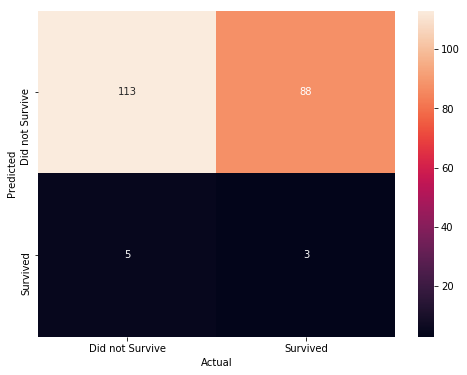

In [20]:
# Make a heatmap of the confusion matrix with seaborn

plt.figure(figsize = (8,6))
sns.heatmap(c_mat_df,annot = True,fmt = 'g')
plt.xlabel("Actual")
plt.ylabel("Predicted")

'''Our model is doing well predicting did not survived class.
It predicts 113 out of 118 not survivors correctly!
But it does a very bad job on predicting survivors. It predicted
only 3 out of 91 survivors correctly ! Our accuracy score does not
give us these details, the confusion matrix does. Also, we need to
calculate other measures like precision, recall, etc... to capture these insights. Let's treat did not survive as positive class and survived as negative class. Let's start with True Positives (tp), True Negatives (tn), False Positives (fp), and False Negatives (fn) here'''

In [21]:
# true positives
tp = 113
#true negatives
tn = 3
#false positives
fp = 88
#false negatives
fn = 5


In [22]:
# Recall (Sensitivity) = tp/tp+fn, Precision = tp/tp+fp

recall = 113/(113+5)
precision = 113/(113+88)
print(recall,precision)

0.9576271186440678 0.5621890547263682


In [23]:
#F1 score = 2*(precision * recall)/precision + recall

f_score = (2*recall*precision)/(recall+precision)
f_score

0.7084639498432602

In [24]:
# Or you can use the built in scikit-learn function to do this at one go!

scores = classification_report(y_test,y_pred_test)
print(scores)

             precision    recall  f1-score   support

          0       0.56      0.96      0.71       118
          1       0.38      0.03      0.06        91

avg / total       0.48      0.56      0.43       209



'''The above report makes clear yet another point of view. You can switch
the two classes while calculating precision, recall, and other metrics.
You can then take an average and report it too !'''

# 4. Receiver Operating Characteristic (ROC) and Area Under the Curve (AUC)

In [25]:
rec, fall_out, thresholds = roc_curve(y_test,y_pred_test)

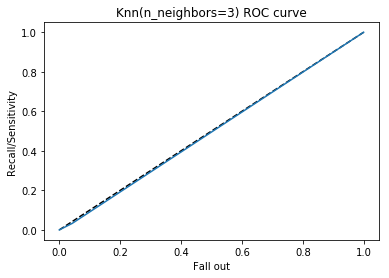

In [26]:
plt.plot([0,1],[0,1],'k--')
plt.plot(rec,fall_out, label='Knn')
plt.xlabel('Fall out')
plt.ylabel('Recall/Sensitivity')
plt.title('Knn(n_neighbors=3) ROC curve')
plt.show()

In [27]:
#Area under ROC curve
roc_auc_score(y_test,y_pred_test)

0.49529707580555044

This is actually a bad,bad model, and we need to do better !